In [1]:
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np

In [66]:
rule_txt = '''
RULES:

if NUM_PIECES is 'HIGH' then 'opening'
if NUM_PIECES is 'MEDIUM' then 'middlegame'
if NUM_PIECES is 'LOW' then 'endgame'


if NUM_MOVES is 'LOW' then 'opening'
if NUM_MOVES is 'MEDIUM' then 'middlegame'
if NUM_MOVES is 'HIGH' then 'endgame'

if BLACK_KING_FILE is 'advanced' AND WHITE_KING_FILE is 'advanced' then 'endgame'
if BLACK_KING_FILE is 'advanced' XOR WHITE_KING_FILE is 'advanced' then 'middlegame'
if BLACK_KING_FILE is not 'advanced' AND WHITE_KING_FILE is note 'advanced' then 'opening'
'''

In [76]:
# Create fuzzy variables
num_pieces = ctrl.Antecedent(np.arange(2, 33, 1), 'num_pieces')
num_moves = ctrl.Antecedent(np.arange(0, 150, 1), 'num_moves')
white_king_advanced_squares = ctrl.Antecedent(np.arange(1,9,1), 'king_advanced_squares')
black_king_advanced_squares = ctrl.Antecedent(np.arange(1,9,1), 'black_advanced_squares')
game_phase = ctrl.Consequent(np.linspace(0, 1, 50), 'game_phase')

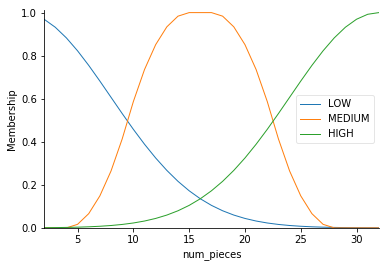

In [77]:
# Populate the fuzzy variables with membership functions
num_pieces['LOW'] = fuzz.gaussmf(num_pieces.universe, 0, 8)
num_pieces['MEDIUM'] = fuzz.pimf(num_pieces.universe, 4, 15, 17, 28)
num_pieces['HIGH'] = fuzz.gaussmf(num_pieces.universe, 32, 8)
num_pieces.view()

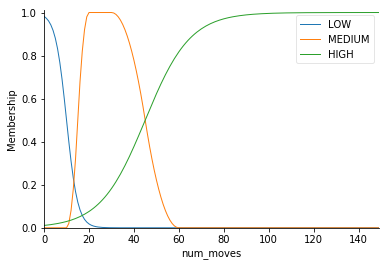

In [78]:
num_moves['LOW'] = fuzz.sigmf(num_moves.universe, 10, -.4)
num_moves['MEDIUM'] = fuzz.pimf(num_moves.universe, 10, 20, 30, 60)
num_moves['HIGH'] = fuzz.sigmf(num_moves.universe, 45, .1)
num_moves.view()

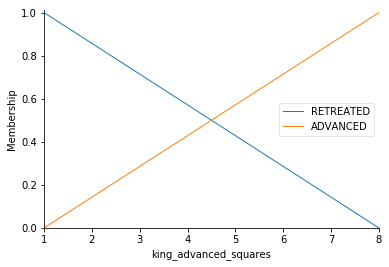

In [80]:
a = fuzz.trimf(black_king_advanced_squares.universe, [1,1,8])
b = fuzz.trimf(black_king_advanced_squares.universe, [1,8,8])
white_king_advanced_squares['RETREATED'] = a
white_king_advanced_squares['ADVANCED'] = b
black_king_advanced_squares['RETREATED'] = a
black_king_advanced_squares['ADVANCED'] = b
white_king_advanced_squares.view()

In [83]:
n = ['OPENING', 'MIDDLE', 'END']
game_phase.automf(names=n)

In [84]:
print(rule_txt)


RULES:

if NUM_PIECES is 'HIGH' then 'opening'
if NUM_PIECES is 'MEDIUM' then 'middlegame'
if NUM_PIECES is 'LOW' then 'endgame'


if NUM_MOVES is 'LOW' then 'opening'
if NUM_MOVES is 'MEDIUM' then 'middlegame'
if NUM_MOVES is 'HIGH' then 'endgame'

if BLACK_KING_FILE is 'advanced' AND WHITE_KING_FILE is 'advanced' then 'endgame'
if BLACK_KING_FILE is 'advanced' XOR WHITE_KING_FILE is 'advanced' then 'middlegame'
if BLACK_KING_FILE is not 'advanced' AND WHITE_KING_FILE is note 'advanced' then 'opening'



In [91]:
rules = [
    ctrl.Rule(antecedent=num_pieces['HIGH'], consequent=game_phase['OPENING']),
    ctrl.Rule(antecedent=num_pieces['MEDIUM'], consequent=game_phase['MIDDLE']),
    ctrl.Rule(antecedent=num_pieces['LOW'], consequent=game_phase['END']),

    ctrl.Rule(antecedent=num_moves['LOW'], consequent=game_phase['OPENING']),
    ctrl.Rule(antecedent=num_moves['MEDIUM'], consequent=game_phase['MIDDLE']),
    ctrl.Rule(antecedent=num_moves['HIGH'], consequent=game_phase['END']),
    
    ctrl.Rule(antecedent=(
        white_king_advanced_squares['RETREATED'] & black_king_advanced_squares['RETREATED']),
        consequent=game_phase['OPENING']),
    ctrl.Rule(antecedent=(
        white_king_advanced_squares['ADVANCED'] & black_king_advanced_squares['ADVANCED']),
        consequent=game_phase['END']),
    ctrl.Rule(antecedent=
        (white_king_advanced_squares['ADVANCED'] | black_king_advanced_squares['ADVANCED']),
        consequent=game_phase['MIDDLE'])
]

In [92]:
system = ctrl.ControlSystem(rules=rules)